Analyzing Global Fishing Vessel Activity: Trends, Predictive Modeling, and Insights for Sustainable Fisheries Management


In [1]:
import pandas as pd

In [ ]:
#dataset collected from : https://globalfishingwatch.org/data-download/datasets/public-fishing-effort

In [3]:
# Load the dataset
file_path = "C:/Users/HP/Downloads/fishing-vessels-v2.csv" 
df = pd.read_csv(file_path)

# Display  information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114191 entries, 0 to 114190
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   mmsi                          114191 non-null  int64  
 1   flag_ais                      91108 non-null   object 
 2   flag_registry                 24652 non-null   object 
 3   flag_gfw                      113303 non-null  object 
 4   vessel_class_inferred         113212 non-null  object 
 5   vessel_class_inferred_score   113212 non-null  float64
 6   vessel_class_registry         23624 non-null   object 
 7   vessel_class_gfw              114191 non-null  object 
 8   self_reported_fishing_vessel  114140 non-null  object 
 9   length_m_inferred             113212 non-null  float64
 10  length_m_registry             20996 non-null   float64
 11  length_m_gfw                  113927 non-null  float64
 12  engine_power_kw_inferred      113212 non-nul

(None,
         mmsi flag_ais flag_registry flag_gfw vessel_class_inferred  \
 0   40120000      NaN           GRC      GRC                   NaN   
 1  444002410      NaN           KOR      KOR                   NaN   
 2  987654320      NaN           PHL      PHL                   NaN   
 3  554128120      NaN           NRU      NRU                   NaN   
 4  112119600      NaN           USA      USA                   NaN   
 
    vessel_class_inferred_score vessel_class_registry   vessel_class_gfw  \
 0                          NaN              trawlers           trawlers   
 1                          NaN     tuna_purse_seines  tuna_purse_seines   
 2                          NaN     tuna_purse_seines  tuna_purse_seines   
 3                          NaN     tuna_purse_seines  tuna_purse_seines   
 4                          NaN               fishing            fishing   
 
   self_reported_fishing_vessel  length_m_inferred  ...  \
 0                         True                N

In [4]:
# Cleaning the dataset

# Dropping columns with excessive missing values stry, vessel_class_registry, length_m_registry)
drop_cols = ['flag_registry', 'vessel_class_registry', 'length_m_registry', 
             'engine_power_kw_registry', 'tonnage_gt_registry', 'registries_listed']
df_cleaned = df.drop(columns=drop_cols)


In [5]:
# Filling missing categorical values with 'Unknown'
categorical_cols = ['flag_ais', 'flag_gfw', 'vessel_class_inferred', 'vessel_class_gfw']
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna('Unknown')



In [6]:
# Filling missing numerical values with median values
numerical_cols = ['length_m_inferred', 'engine_power_kw_inferred', 'tonnage_gt_inferred', 
                  'fishing_hours_2012', 'fishing_hours_2013', 'fishing_hours_2014', 
                  'fishing_hours_2015', 'fishing_hours_2016', 'fishing_hours_2017', 
                  'fishing_hours_2018', 'fishing_hours_2019', 'fishing_hours_2020']

for col in numerical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())



In [7]:
# Convert self-reported fishing vessel column to boolean
df_cleaned['self_reported_fishing_vessel'] = df_cleaned['self_reported_fishing_vessel'].astype(bool)



In [8]:
# Display cleaned dataset
df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114191 entries, 0 to 114190
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   mmsi                          114191 non-null  int64  
 1   flag_ais                      114191 non-null  object 
 2   flag_gfw                      114191 non-null  object 
 3   vessel_class_inferred         114191 non-null  object 
 4   vessel_class_inferred_score   113212 non-null  float64
 5   vessel_class_gfw              114191 non-null  object 
 6   self_reported_fishing_vessel  114191 non-null  bool   
 7   length_m_inferred             114191 non-null  float64
 8   length_m_gfw                  113927 non-null  float64
 9   engine_power_kw_inferred      114191 non-null  float64
 10  engine_power_kw_gfw           113731 non-null  float64
 11  tonnage_gt_inferred           114191 non-null  float64
 12  tonnage_gt_gfw                114031 non-nul

(None,
         mmsi flag_ais flag_gfw vessel_class_inferred  \
 0   40120000  Unknown      GRC               Unknown   
 1  444002410  Unknown      KOR               Unknown   
 2  987654320  Unknown      PHL               Unknown   
 3  554128120  Unknown      NRU               Unknown   
 4  112119600  Unknown      USA               Unknown   
 
    vessel_class_inferred_score   vessel_class_gfw  \
 0                          NaN           trawlers   
 1                          NaN  tuna_purse_seines   
 2                          NaN  tuna_purse_seines   
 3                          NaN  tuna_purse_seines   
 4                          NaN            fishing   
 
    self_reported_fishing_vessel  length_m_inferred  length_m_gfw  \
 0                          True              21.89         26.30   
 1                         False              21.89         79.60   
 2                         False              21.89         66.40   
 3                         False              2

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


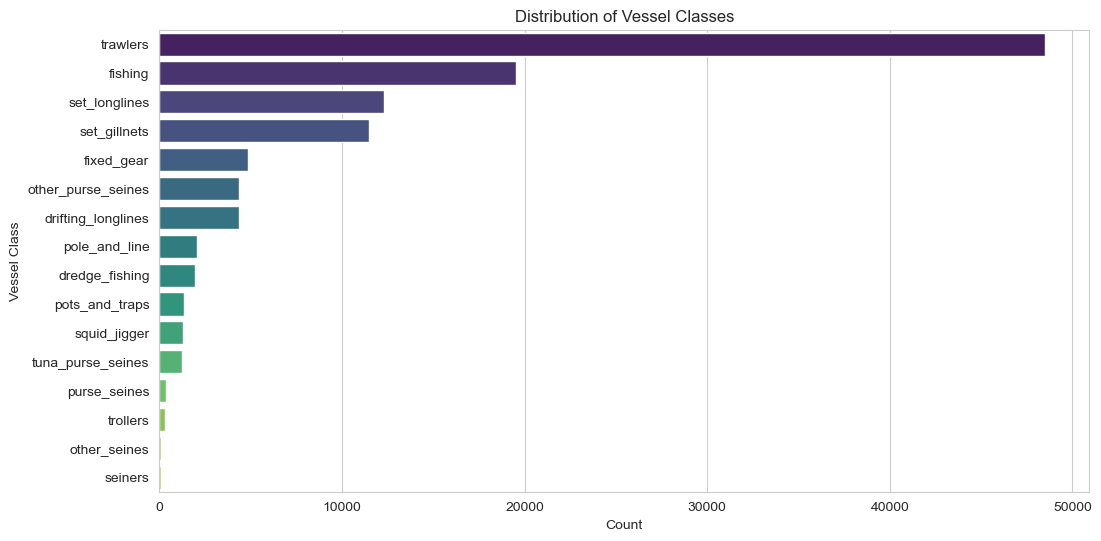

In [10]:

# Set plot style
sns.set_style("whitegrid")

# 1. Distribution of Vessel Classes
plt.figure(figsize=(12, 6))
sns.countplot(y=df_cleaned['vessel_class_gfw'], order=df_cleaned['vessel_class_gfw'].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Vessel Class")
plt.title("Distribution of Vessel Classes")
plt.show()




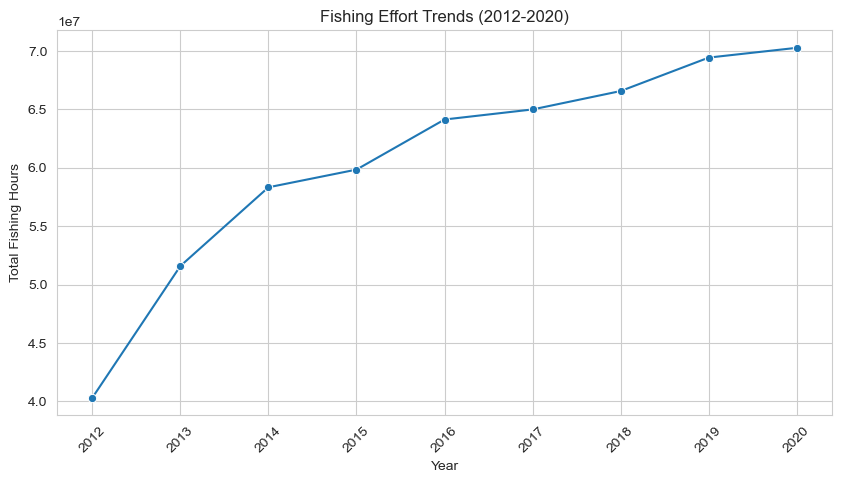

In [11]:
# 2. Fishing Effort Trends Over the Years
fishing_hours_cols = [col for col in df_cleaned.columns if "fishing_hours_" in col]
fishing_hours_trend = df_cleaned[fishing_hours_cols].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=fishing_hours_trend.index.str.replace("fishing_hours_", ""), y=fishing_hours_trend.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Total Fishing Hours")
plt.title("Fishing Effort Trends (2012-2020)")
plt.xticks(rotation=45)
plt.show()



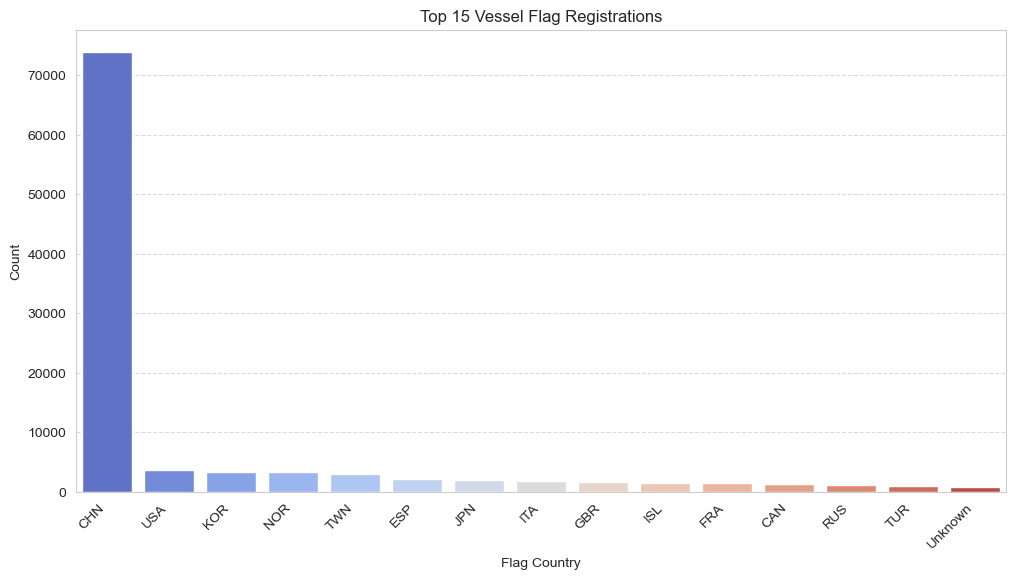

In [22]:
plt.figure(figsize=(12, 6))

# Create vertical bar chart
sns.barplot(x=flag_counts.index, y=flag_counts.values, palette="coolwarm")

# Labels and Title
plt.xlabel("Flag Country")
plt.ylabel("Count")
plt.title("Top 15 Vessel Flag Registrations")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



In [23]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [24]:
# Prepare time-series regression data (Fishing Hours vs Year)
fishing_hours_trend_df = df_cleaned[fishing_hours_cols].sum().reset_index()
fishing_hours_trend_df.columns = ['Year', 'Total_Fishing_Hours']
fishing_hours_trend_df['Year'] = fishing_hours_trend_df['Year'].str.replace("fishing_hours_", "").astype(int)


In [25]:
# Time-Series Regression
X_time = sm.add_constant(fishing_hours_trend_df['Year'])  # Add intercept
y_time = fishing_hours_trend_df['Total_Fishing_Hours']
model_time = sm.OLS(y_time, X_time).fit()


In [27]:

# Multivariate Regression (Fishing Hours vs. Vessel Attributes)
X_multi = df_cleaned[['length_m_inferred', 'engine_power_kw_inferred', 'tonnage_gt_inferred']]
y_multi = df_cleaned['fishing_hours_2020']
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_reg = LinearRegression()
multi_reg.fit(X_multi_train, y_multi_train)
y_multi_pred = multi_reg.predict(X_multi_test)



In [28]:
# Categorical Regression (Vessel Class vs. Fishing Hours)
df_cleaned['vessel_class_encoded'] = LabelEncoder().fit_transform(df_cleaned['vessel_class_gfw'])
X_cat = sm.add_constant(df_cleaned['vessel_class_encoded'])
y_cat = df_cleaned['fishing_hours_2020']
model_cat = sm.OLS(y_cat, X_cat).fit()


In [29]:

# Display results
model_time_summary = model_time.summary()
model_cat_summary = model_cat.summary()

(model_time_summary, multi_reg.coef_, model_cat_summary)

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(<class 'statsmodels.iolib.summary.Summary'>
 """
                              OLS Regression Results                            
 Dep. Variable:     Total_Fishing_Hours   R-squared:                       0.859
 Model:                             OLS   Adj. R-squared:                  0.839
 Method:                  Least Squares   F-statistic:                     42.73
 Date:                 Sun, 09 Mar 2025   Prob (F-statistic):           0.000323
 Time:                         20:55:43   Log-Likelihood:                -148.12
 No. Observations:                    9   AIC:                             300.2
 Df Residuals:                        7   BIC:                             300.6
 Df Model:                            1                                         
 Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------------------------

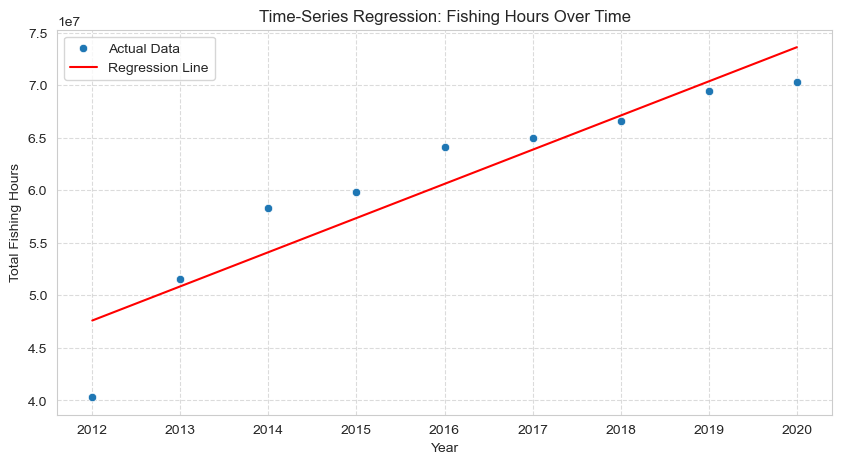

In [31]:
# 1. Time-Series Regression Visualization (Fishing Hours vs. Year)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=fishing_hours_trend_df['Year'], y=fishing_hours_trend_df['Total_Fishing_Hours'], label="Actual Data")
sns.lineplot(x=fishing_hours_trend_df['Year'], y=model_time.predict(X_time), color="red", label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Total Fishing Hours")
plt.title("Time-Series Regression: Fishing Hours Over Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

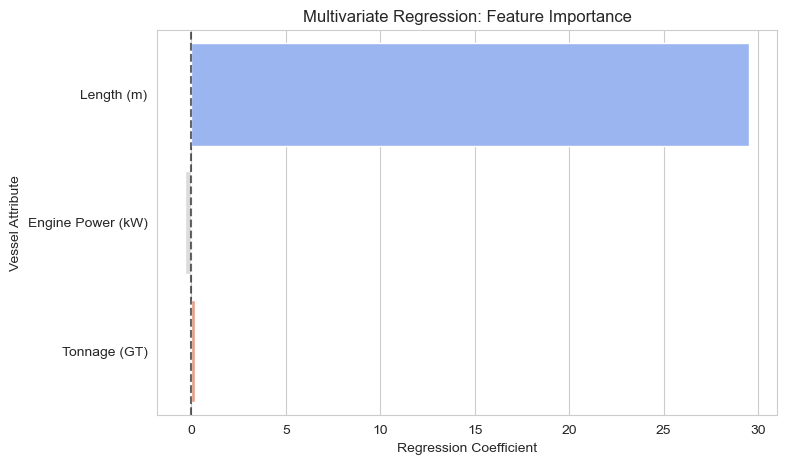

In [32]:
# 2. Multivariate Regression Visualization (Feature Importance)
plt.figure(figsize=(8, 5))
coef_labels = ['Length (m)', 'Engine Power (kW)', 'Tonnage (GT)']
sns.barplot(x=multi_reg.coef_, y=coef_labels, palette="coolwarm")
plt.xlabel("Regression Coefficient")
plt.ylabel("Vessel Attribute")
plt.title("Multivariate Regression: Feature Importance")
plt.axvline(x=0, color="black", linestyle="--", alpha=0.6)
plt.show()

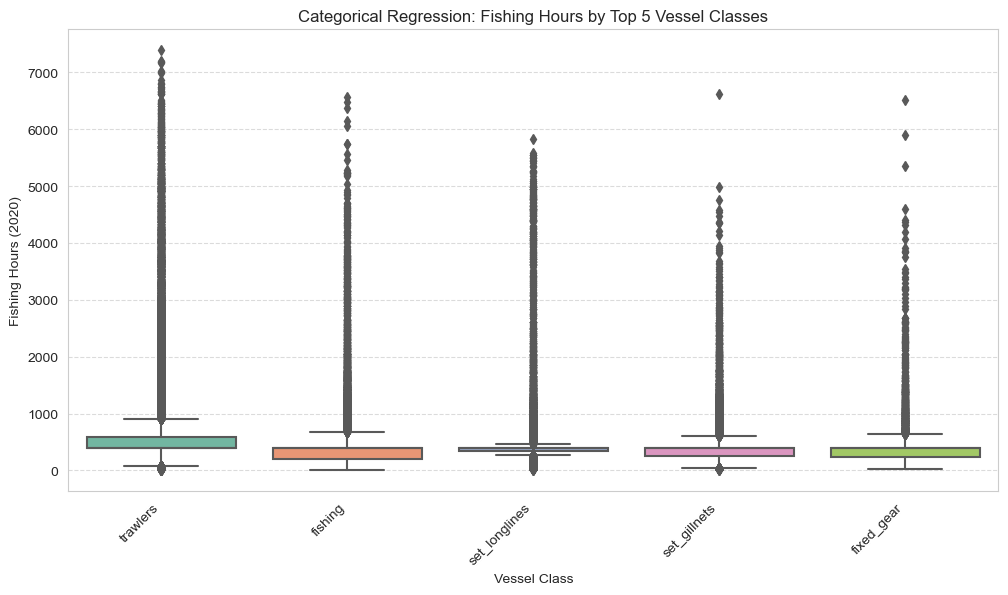

In [35]:
# 3. Categorical Regression Visualization (Vessel Class vs. Fishing Hours)

plt.figure(figsize=(12, 6))

# Select top 5 vessel classes based on count
top_5_classes = df_cleaned['vessel_class_gfw'].value_counts().nlargest(5).index
df_top_5 = df_cleaned[df_cleaned['vessel_class_gfw'].isin(top_5_classes)]

# Create boxplot for only top 5 vessel classes
sns.boxplot(x=df_top_5['vessel_class_gfw'], y=df_top_5['fishing_hours_2020'], palette="Set2")

# Format plot
plt.xticks(rotation=45, ha="right")
plt.xlabel("Vessel Class")
plt.ylabel("Fishing Hours (2020)")
plt.title("Categorical Regression: Fishing Hours by Top 5 Vessel Classes")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
